<img src="Electronic_Brain.png" width="200" style="float:left">
<h1> Summer 2021 ML Course.</h1>
<h2> Exercise 2: Stock Trader<br>Tools: Numpy, Matplotlib</h2>

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

<img src="desktop-computer-icon.png" width="40" style="float:left">
<h1>&nbsp;Signal Generation</h1>
<br>Given a stock's price history, assume we are only allowed one purchase and one sale.<br>Our job: find the maximum profit potential!

In [13]:
# Create a semi-realistic prices array.
# Start off with a mostly NaN array with a few 'turning points' (local min/max).
prices = np.full(5000, fill_value=np.nan)
prices[[0, 1250, 3000, -1]] = [80., 30., 75., 50.]

In [14]:
# Linearly interpolate the missing values and add some noise.
# --- NOTICE how the turning (valid) points are selected and all others are interpolated.
x = np.arange(len(prices))
is_valid = ~np.isnan(prices)                                  # Only look at valid numbers.
prices = np.interp(x=x, xp=x[is_valid], fp=prices[is_valid])  # Interpolate between them.
prices += np.random.randn(len(prices)) * 2                    # Add normally distributed noise.

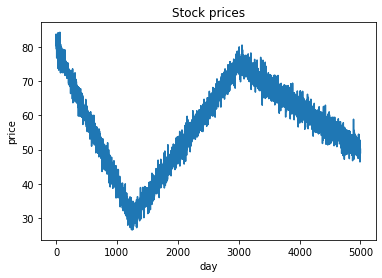

In [15]:
fig, ax = plt.subplots()
ax.plot(x, prices)
ax.set(xlabel='day', ylabel='price', title='Stock prices');

<img src="Roni_Roshbakir.png" width="36" style="float:left">
<h2>&nbsp; Ronni Roshbakir's solution: check each pair.</h2>

In [16]:
# Ronni Roshbakir's solution: check each pair.
def naive_profit(prices):
    xmin = xmax = pmin = pmin = max_profit = -1
    for i in range(len(prices)):
        for j in range(i):
            if prices[i] - prices[j] > max_profit:
                xmin=j
                xmax=i
                pmin=prices[j]
                pmax=prices[i]
                max_profit = prices[i] - prices[j]
    return xmin, xmax, pmin, pmax, max_profit

%time xmin, xmax, pmin, pmax, max_profit = naive_profit(prices)
print("Naive profit:", max_profit)

Wall time: 3.21 s
Naive profit: 53.96636627570963


<img src="Batya_Bingo.png" width="60" style="float:left">
<h2>&nbsp; Bayta Bingo's solution:</h2><br>
Use Numpy's accumulate() method, useful for calculating cumulative sums / mins.

In [17]:
# Batya Bingo's solution.
# Use Numpy's accumulate() method, useful for calculating cumulative sums / mins.
# WARNING: solution assumes global minimum reached before global max,
# in real life we should check the other option as well!
def numpy_profit(prices):
    # Please help Batya!
    return(0)

In [18]:
# Run the function 100 times to profile the running time.
%timeit -n 100 max_profit = numpy_profit(prices)
print("Max profit:", max_profit)

125 ns ± 2.77 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
Max profit: 53.96636627570963
